Exploratory Data Analysis for small Road Safety dataset (UK_sample_small.csv - 500 instances)

In [ ]:
#This is exploratory data analysis performed over small data set
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas-profiling[notebook]

In [ ]:
!pip install typing-extensions --upgrade
!pip install --upgrade pandas-profiling[notebook]

In [ ]:
!pip install sweetviz


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

file_path = '/content/drive/MyDrive/IDA_EDA/UK_sample_small.csv'
df = pd.read_csv(file_path)
df #display the table

report = sv.analyze(df)

# Save the report to an HTML file
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   499 non-null    int64  
 1   Accident_Index                               499 non-null    object 
 2   Location_Easting_OSGR                        499 non-null    int64  
 3   Location_Northing_OSGR                       499 non-null    int64  
 4   Longitude                                    499 non-null    float64
 5   Latitude                                     499 non-null    float64
 6   Police_Force                                 499 non-null    int64  
 7   Accident_Severity                            499 non-null    int64  
 8   Number_of_Vehicles                           499 non-null    int64  
 9   Number_of_Casualties                         499 non-null    int64  
 10  Da

In [ ]:
df.describe()


,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.0,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0,499.0
mean,249.000000,525913.787575,179259.438878,-0.187444,51.498204,1.0,2.883768,1.779559,1.112224,4.228457,11.601202,3.751503,1083.565130,30.140281,3.492986,434.094188,1.0,2005.0
std,144.193157,1273.797205,1313.263389,0.018036,0.011992,0.0,0.320825,0.559244,0.490298,1.789054,1.998815,1.087706,1429.277045,1.729835,2.787207,1098.264610,0.0,0.0
min,0.000000,523160.000000,177020.000000,-0.226286,51.478096,1.0,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000,20.000000,-1.000000,0.000000,1.0,2005.0
25%,124.500000,524815.000000,178350.000000,-0.203174,51.489835,1.0,3.000000,1.000000,1.000000,3.000000,12.000000,3.000000,4.000000,30.000000,3.000000,0.000000,1.0,2005.0
50%,249.000000,526030.000000,179030.000000,-0.186071,51.495898,1.0,3.000000,2.000000,1.000000,4.000000,12.000000,3.000000,315.000000,30.000000,5.000000,0.000000,1.0,2005.0
75%,373.500000,526930.000000,180240.000000,-0.173428,51.507210,1.0,3.000000,2.000000,1.000000,6.000000,12.000000,4.000000,3217.000000,30.000000,6.000000,0.000000,1.0,2005.0
max,498.000000,528540.000000,182500.000000,-0.150108,51.527785,1.0,3.000000,4.000000,8.000000,7.000000,12.000000,6.000000,4207.000000,50.000000,6.000000,4206.000000,1.0,2005.0


In [ ]:
# Replace NaN values with mean for numerical columns
numerical_columns = df.select_dtypes(include='number').columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Replace NaN values with mode for categorical columns
categorical_columns = df.select_dtypes(exclude='number').columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])
df


,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680,178240,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,1,200501BS00002,524170,181650,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,2,200501BS00003,524520,182240,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,3,200501BS00004,526900,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,4,200501BS00005,528060,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,494,200501BS70517,525010,180390,-0.200054,51.508566,1,2,2,1,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002828,2005
495,495,200501BS70518,527010,179020,-0.171743,51.495809,1,3,2,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002821,2005
496,496,200501BS70519,526090,177600,-0.185496,51.483253,1,3,2,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002912,2005
497,497,200501BS70521,526240,178880,-0.182880,51.494723,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002835,2005


In [ ]:
#check for naN values
df.isna()
df.isnull().sum()

Unnamed: 0                                     0
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class      

In [ ]:
#choose some selected attributes to  perform summary statistics
attributes = ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties", "Day_of_Week", "Light_Conditions"]


In [ ]:
# Summary statistics for selected attributes
summary_stats = df[attributes].describe()
print(summary_stats)

       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
count         499.000000          499.000000            499.000000   
mean            2.883768            1.779559              1.112224   
std             0.320825            0.559244              0.490298   
min             2.000000            1.000000              1.000000   
25%             3.000000            1.000000              1.000000   
50%             3.000000            2.000000              1.000000   
75%             3.000000            2.000000              1.000000   
max             3.000000            4.000000              8.000000   

       Day_of_Week  
count   499.000000  
mean      4.228457  
std       1.789054  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max       7.000000  


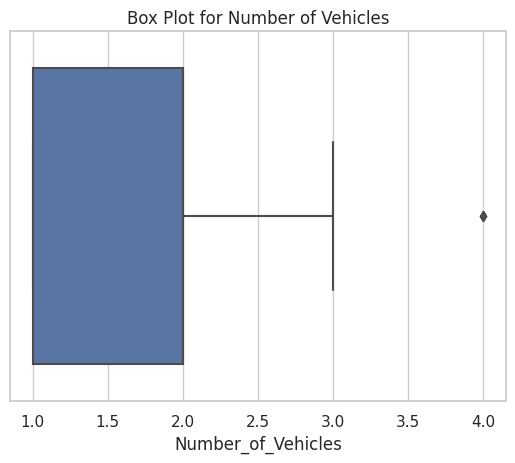

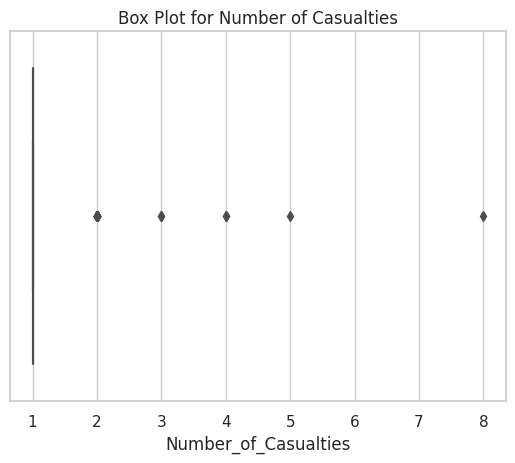

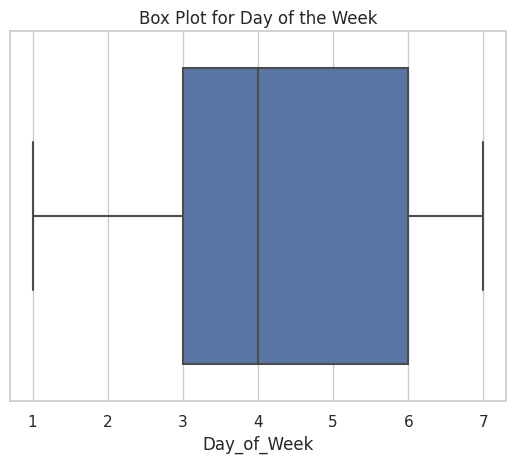

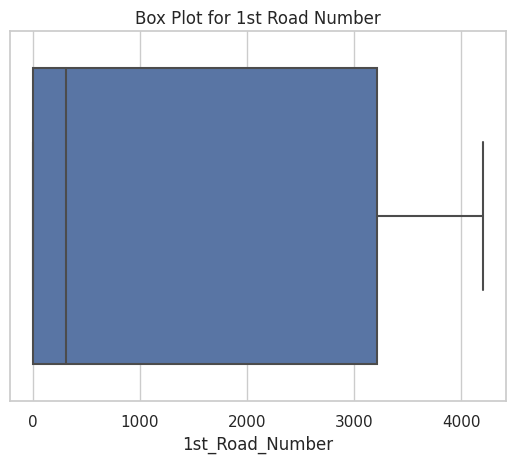

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
sns.set(style="whitegrid")

# Box plot for Number of Vehicles
sns.boxplot(x=df["Number_of_Vehicles"])
plt.title("Box Plot for Number of Vehicles")
plt.show()

# Box plot for Number of Casualties
sns.boxplot(x=df["Number_of_Casualties"])
plt.title("Box Plot for Number of Casualties")
plt.show()

# Box plot for Day of the week
sns.boxplot(x=df["Day_of_Week"])
plt.title("Box Plot for Day of the Week")
plt.show()

# Box plot for 1st Road Number
sns.boxplot(x=df["1st_Road_Number"])
plt.title("Box Plot for 1st Road Number")
plt.show()


In [ ]:
df[['Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week', 'Light_Conditions',
    'Road_Type', 'Speed_limit', 'Junction_Control', 'Weather_Conditions', 'Road_Surface_Conditions'
]].corr()

<ipython-input-71-540e4d2529ed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ]].corr()


,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Speed_limit
Accident_Severity,1.000000,0.047167,0.032029,-0.030610,-0.042926
Number_of_Vehicles,0.047167,1.000000,0.031818,-0.055934,-0.009484
Number_of_Casualties,0.032029,0.031818,1.000000,0.041678,-0.018599
Day_of_Week,-0.030610,-0.055934,0.041678,1.000000,0.015578
Speed_limit,-0.042926,-0.009484,-0.018599,0.015578,1.000000


from matplotlib import pyplot as plt
_df_25['Accident_Severity'].plot(kind='hist', bins=20, title='Accident_Severity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Number_of_Vehicles'].plot(kind='hist', bins=20, title='Number_of_Vehicles')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Number_of_Casualties'].plot(kind='hist', bins=20, title='Number_of_Casualties')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28['Day_of_Week'].plot(kind='hist', bins=20, title='Day_of_Week')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Accident_Severity', y='Number_of_Vehicles', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Number_of_Vehicles', y='Number_of_Casualties', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Number_of_Casualties', y='Day_of_Week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32.plot(kind='scatter', x='Day_of_Week', y='Speed_limit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Accident_Severity'].plot(kind='line', figsize=(8, 4), title='Accident_Severity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Number_of_Vehicles'].plot(kind='line', figsize=(8, 4), title='Number_of_Vehicles')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Number_of_Casualties'].plot(kind='line', figsize=(8, 4), title='Number_of_Casualties')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_36['Day_of_Week'].plot(kind='line', figsize=(8, 4), title='Day_of_Week')
plt.gca().spines[['top', 'right']].set_visible(False)

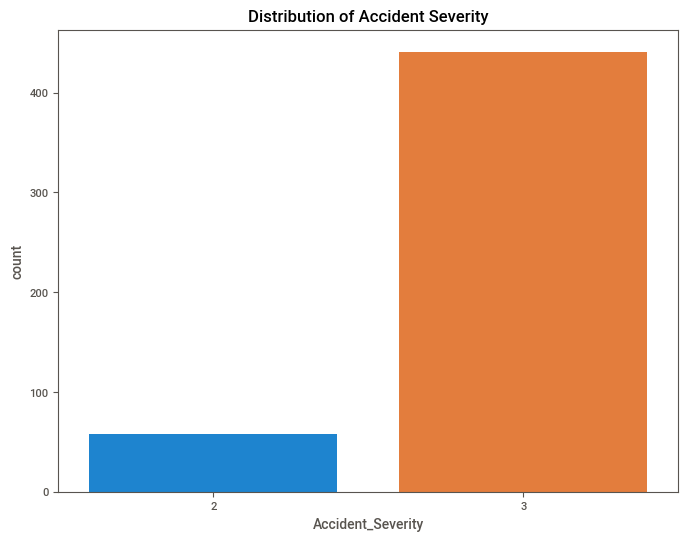

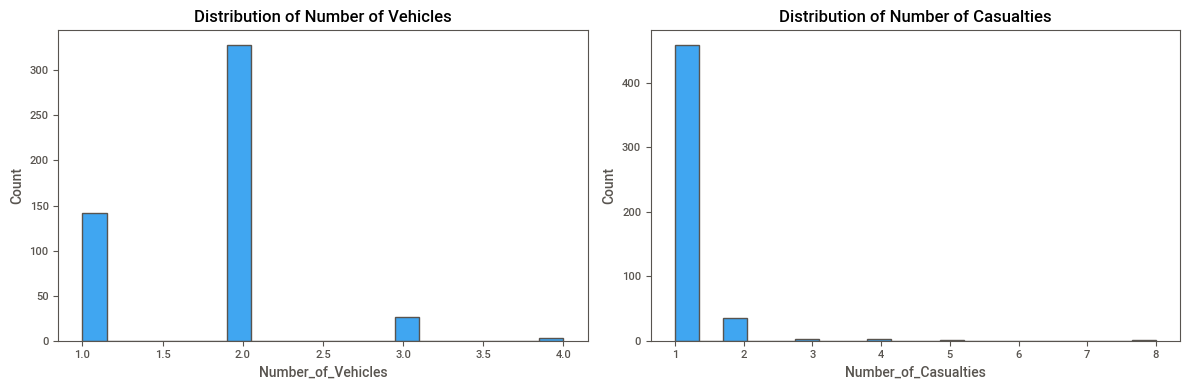

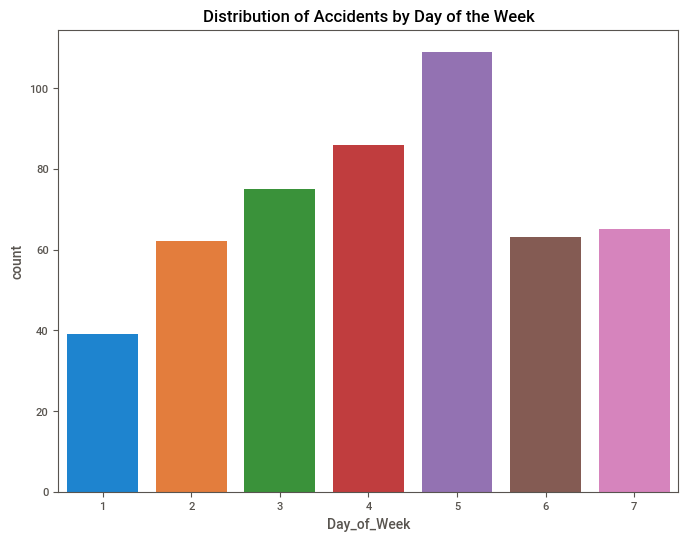

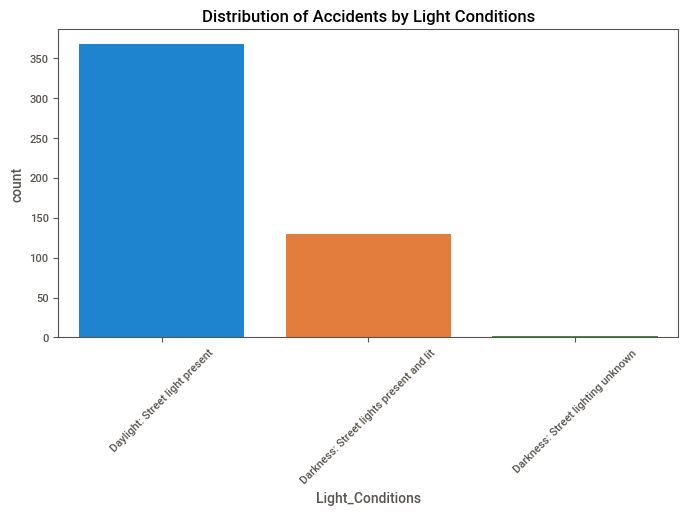

In [ ]:
# Create a bar chart to visualize the distribution of "Accident_Severity"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Accident_Severity")
plt.title("Distribution of Accident Severity")
plt.show()

# Histogram for "Number_of_Vehicles" and "Number_of_Casualties"
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="Number_of_Vehicles", bins=20)
plt.title("Distribution of Number of Vehicles")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x="Number_of_Casualties", bins=20)
plt.title("Distribution of Number of Casualties")

plt.tight_layout()
plt.show()

# Create a bar chart to visualize the distribution of accidents by "Day_of_Week"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Day_of_Week")
plt.title("Distribution of Accidents by Day of the Week")
plt.show()

# Create a bar chart to visualize the distribution of accidents by "Light_Conditions"
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Light_Conditions")
plt.title("Distribution of Accidents by Light Conditions")
plt.xticks(rotation=45)
plt.show()


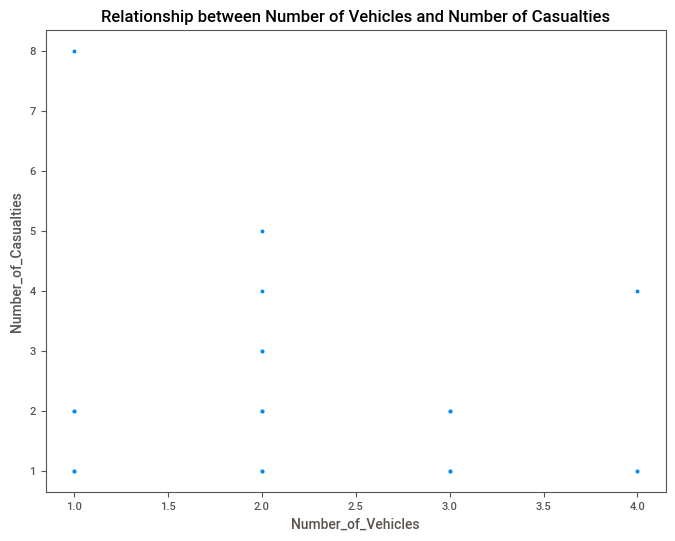

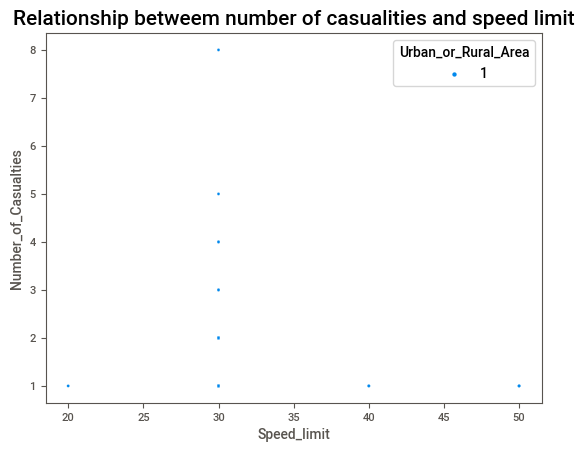

In [ ]:
# Scatter plot between "Number_of_Vehicles" and "Number_of_Casualties"
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Number_of_Vehicles", y="Number_of_Casualties")
plt.title("Relationship between Number of Vehicles and Number of Casualties")
plt.show()

#Scatter plot for finding the relation ship between number of casualities and speed limit
sns.scatterplot(data = df,x = 'Speed_limit', y = 'Number_of_Casualties', hue = 'Urban_or_Rural_Area', size = 'Urban_or_Rural_Area')
plt.title('Relationship betweem number of casualities and speed limit', fontsize = 15)
plt.ylabel('Number_of_Casualties')
plt.xlabel('Speed_limit')
plt.show()


       Accident_Severity  Number_of_Vehicles  Number_of_Casualties  \
count         499.000000          499.000000            499.000000   
mean            2.883768            1.779559              1.112224   
std             0.320825            0.559244              0.490298   
min             2.000000            1.000000              1.000000   
25%             3.000000            1.000000              1.000000   
50%             3.000000            2.000000              1.000000   
75%             3.000000            2.000000              1.000000   
max             3.000000            4.000000              8.000000   

       Day_of_Week  
count   499.000000  
mean      4.228457  
std       1.789054  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max       7.000000  
Accident_Severity       2.883768
Number_of_Vehicles      1.779559
Number_of_Casualties    1.112224
Day_of_Week             4.228457
dtype: float64
Accident_Severity       3.0
Numbe

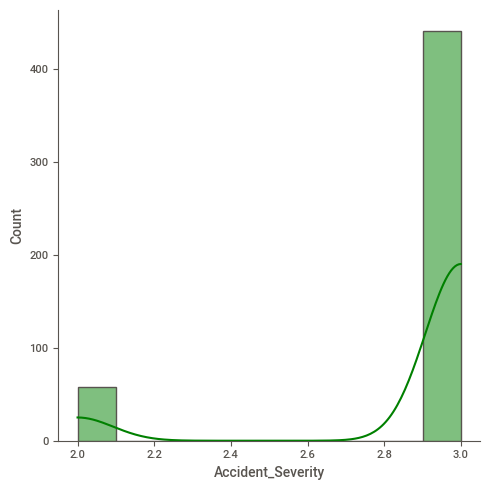

<ipython-input-68-c5b8110c4b5f>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Number_of_Vehicles"],color="blue",bins=20)
<ipython-input-68-c5b8110c4b5f>:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Number_of_Casualties"],color="green",bins=20)
<ipython-input-68-c5b8110c4b5f>:27:

Text(0.5, 1.0, 'Accident Severity vs 1st Road Number')

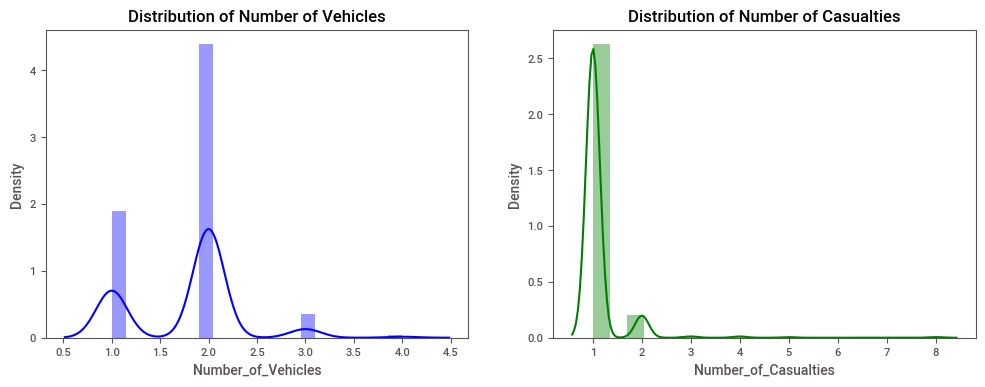

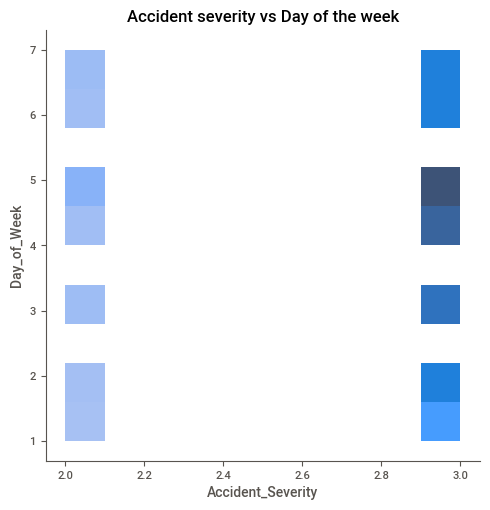

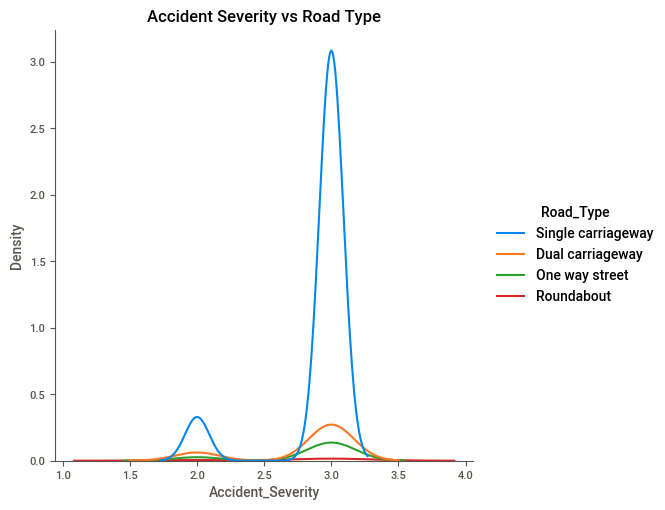

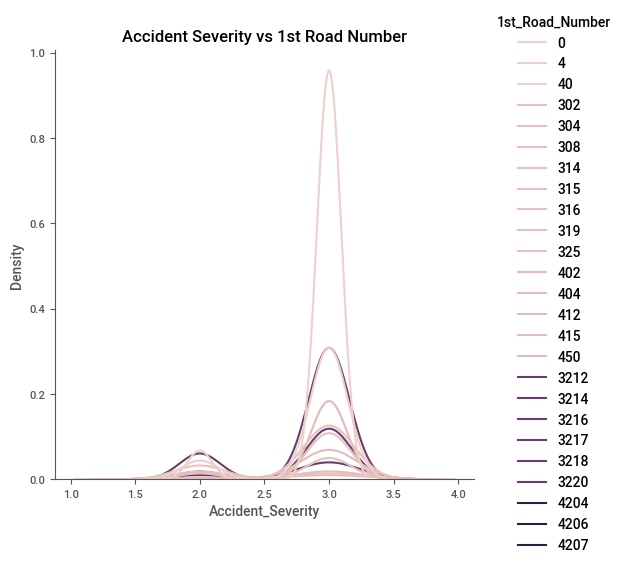

In [ ]:
# Descriptive Statistics
summary_stats = df[attributes].describe()
# Mean and Median for selected attributes
mean_values = df[attributes].mean(numeric_only=True)
median_values = df[attributes].median(numeric_only=True)
print(summary_stats)
print(mean_values)
print(median_values)

#distplot
sns.displot(df['Accident_Severity'],color="green",kde=True)
plt.show()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.distplot(df["Number_of_Vehicles"],color="blue",bins=20)
plt.title("Distribution of Number of Vehicles")

plt.subplot(1, 2, 2)
sns.distplot(df["Number_of_Casualties"],color="green",bins=20)
plt.title("Distribution of Number of Casualties")

sns.displot(data = df,x="Accident_Severity",y="Day_of_Week")
plt.title("Accident severity vs Day of the week")

sns.displot(data=df, x="Accident_Severity",hue="Road_Type", kind="kde")
plt.title("Accident Severity vs Road Type")

sns.displot(data=df, x="Accident_Severity",hue="1st_Road_Number", kind="kde")
plt.title("Accident Severity vs 1st Road Number")


In [ ]:
#Univariate - Analysis

#For Light_Conditions attribute

# Create a new binary column based on the conditions
# Perform One-Hot Encoding
df['Light_Conditions_Num'] = df['Light_Conditions'].map({
    'Daylight: Street light present': 0,
    'Darkness: Street lights present and lit': 1,
    'Darkness: Street lighting unknown': 2,
})
count_0 = (df['Light_Conditions_Num'] == 0).sum()
count_1 = (df['Light_Conditions_Num'] == 1).sum()
count_2 = (df['Light_Conditions_Num'] == 2).sum()
print(f'Count of 0s - Daylight: Street light present: {count_0}')
print(f'Count of 1s - Darkness: Street lights present and lit: {count_1}')
print(f'Count of 2s - Darkness: Street lighting unknown: {count_2}')

count = count_1+count_2
# Print the result
if count_0 > count:
    print('Daylight: Street light present has more instances i.e; accidents happen more during daytime.')
elif count > count_1:
    print('Darkness: Street lights present and lit has more instances i.e; accidents happen more when Street lights present and lit.')
else:
    print('The instances of Daylight and Darkness are equal.')


Count of 0s - Daylight: Street light present: 367
Count of 1s - Darkness: Street lights present and lit: 130
Count of 2s - Darkness: Street lighting unknown: 2
Daylight: Street light present has more instances.


In [ ]:
# Univariate analysis
# For Weather_Conditions attribute
# Perform One-Hot Encoding
df['Weather_Conditions_Num'] = df['Weather_Conditions'].map({
    'Raining without high winds': 0,
    'Fine without high winds': 1,
    'Snowing without high winds': 2,
    'Other':3
})
count_0 = (df['Weather_Conditions_Num'] == 0).sum()
count_1 = (df['Weather_Conditions_Num'] == 1).sum()
count_2 = (df['Weather_Conditions_Num'] == 2).sum()
count_3 = (df['Weather_Conditions_Num'] == 3).sum()
print(f'Count of 0s - Raining without high winds: {count_0}')
print(f'Count of 1s - Fine without high winds: {count_1}')
print(f'Count of 2s - Snowing without high winds: {count_2}')
print(f'Count of 3s - other: {count_3}')

# Print the result
counts = {
    'Raining without high winds': count_0,
    'Fine without high winds': count_1,
    'Snowing without high winds': count_2,
    'Other': count_3
}

# Find the key with the maximum count
max_condition = max(counts, key=counts.get)

# Print the result
print(f'The weather condition is : {max_condition} (Count: {counts[max_condition]}) more number of accidents are happening')

Count of 0s - Raining without high winds: 65
Count of 1s - Fine without high winds: 425
Count of 2s - Snowing without high winds: 5
Count of 3s - other: 2
The weather condition is : Fine without high winds (Count: 425) more number of accidents are happening


In [ ]:
# Univariate analysis
# For Road_Surface_Conditions attribute
# Perform One-Hot Encoding
df['crossing_Num'] = df['Road_Surface_Conditions'].map({
    'Wet/Damp': 0,
    'Frost/Ice': 1,
    'Dry': 2
})
count_0 = (df['crossing_Num'] == 0).sum()
count_1 = (df['crossing_Num'] == 1).sum()
count_2 = (df['crossing_Num'] == 2).sum()
print(f'Count of 0s - Wet/Damp: {count_0}')
print(f'Count of 1s - Frost/Ice: {count_1}')
print(f'Count of 2s - Dry: {count_2}')
# Print the result
count_val = {
    'Wet/Damp': 0,
    'Frost/Ice': 1,
    'Dry': 2
}

# Find the key with the maximum count
max_c = max(count_val, key=count_val.get)

# Print the result
print(f'Road surface condition where more accidents are happening : {max_c} (Count: {count_val[max_c]})')


Count of 0s - Wet/Damp: 92
Count of 1s - Frost/Ice: 1
Count of 2s - Dry: 405
Road surface condition where more accidents are happening : Dry (Count: 2)
